In [86]:
%matplotlib notebook

In [150]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


Границы рассмотрения

In [151]:
eps = 1e-6
step = 0.01
range_x = [-2 + eps, 2 - eps]
range_y = [-2 + eps, 2 - eps]

In [152]:
def Sedlo(x, y):
    res = np.zeros(len(x)*len(y)).reshape(len(x), len(y))
    for i in range(len(x)):
        for j in range(len(y)):
            res[i, j] = (x[i] * y[j])/((x[i]-2)*(y[j]-2)*(x[i]+2)*(y[j]+2))
    return res

def npSedlo(x, y):
    return (x * y)/((x-2)*(y-2)*(x+2)*(y+2))
    
def SedloGrph(x, y, topBorder = 2.1, bottomBorder = -2.1):
    res = np.zeros(len(x)*len(y)).reshape(len(x), len(y))
    for i in range(len(x)):
        for j in range(len(y)):
            res[i, j] = (x[i] * y[j])/((x[i]-2)*(y[j]-2)*(x[i]+2)*(y[j]+2))
            if (res[i, j] > topBorder):
                res[i, j] = topBorder
            if (res[i, j] < bottomBorder):
                res[i, j] = bottomBorder
    return res

In [153]:
x = np.linspace(-1.999, 1.999, 100)
y = np.linspace(-1.999, 1.999, 100)
X, Y = np.meshgrid(x, y)
Z = SedloGrph(x, y)

In [154]:
xl = np.linspace(-10, -2.01, 100)
yl = np.linspace(-10, -2.01, 100)
Xl, Yl = np.meshgrid(xl, yl)
Zl = SedloGrph(xl, yl)

<IPython.core.display.Javascript object>


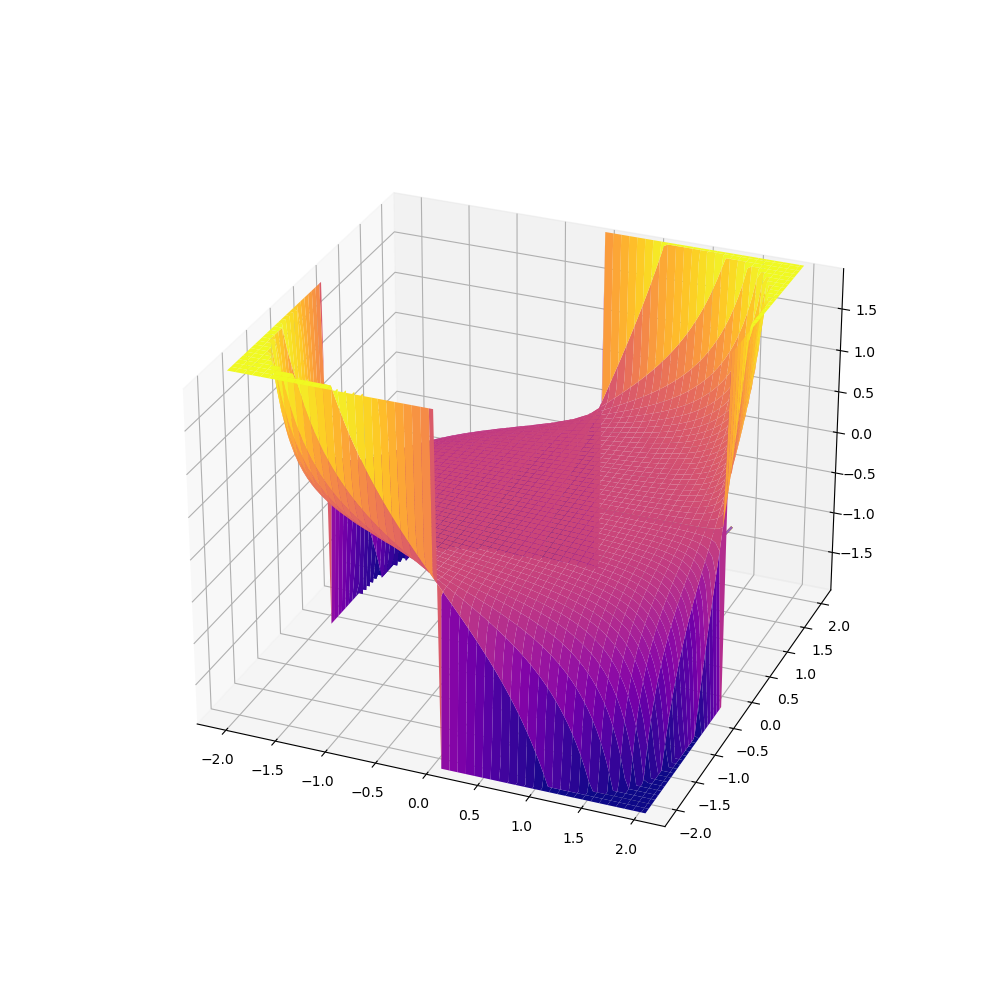

In [155]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(-1.9, 1.9)

ax.plot_surface(X, Y, Z, cmap = "plasma")
#ax.plot_surface(Xl, Yl, Zl, cmap = "plasma")

In [167]:
def Max_Y(fix_x):
    numpoints = int((range_y[1] - range_y[0]) / step)
    y = np.linspace(range_y[0], range_y[1], numpoints)
    x = np.ones(len(y)) * fix_x
    z = npSedlo(x, y)
    return np.max(z), y, z

In [209]:
def Min_X():
    numpoints = int((range_x[1] - range_x[0]) / step)
    X = np.linspace(range_x[0], range_x[1], numpoints)
    maxF = []
    for x in X:
        max_y, _y, _z = Max_Y(x)
        maxF.append(max_y)
    return min(maxF)

In [213]:
res = Min_X()
res

-0.0

In [214]:
min_f, y, z = Max_Y(res)

<IPython.core.display.Javascript object>


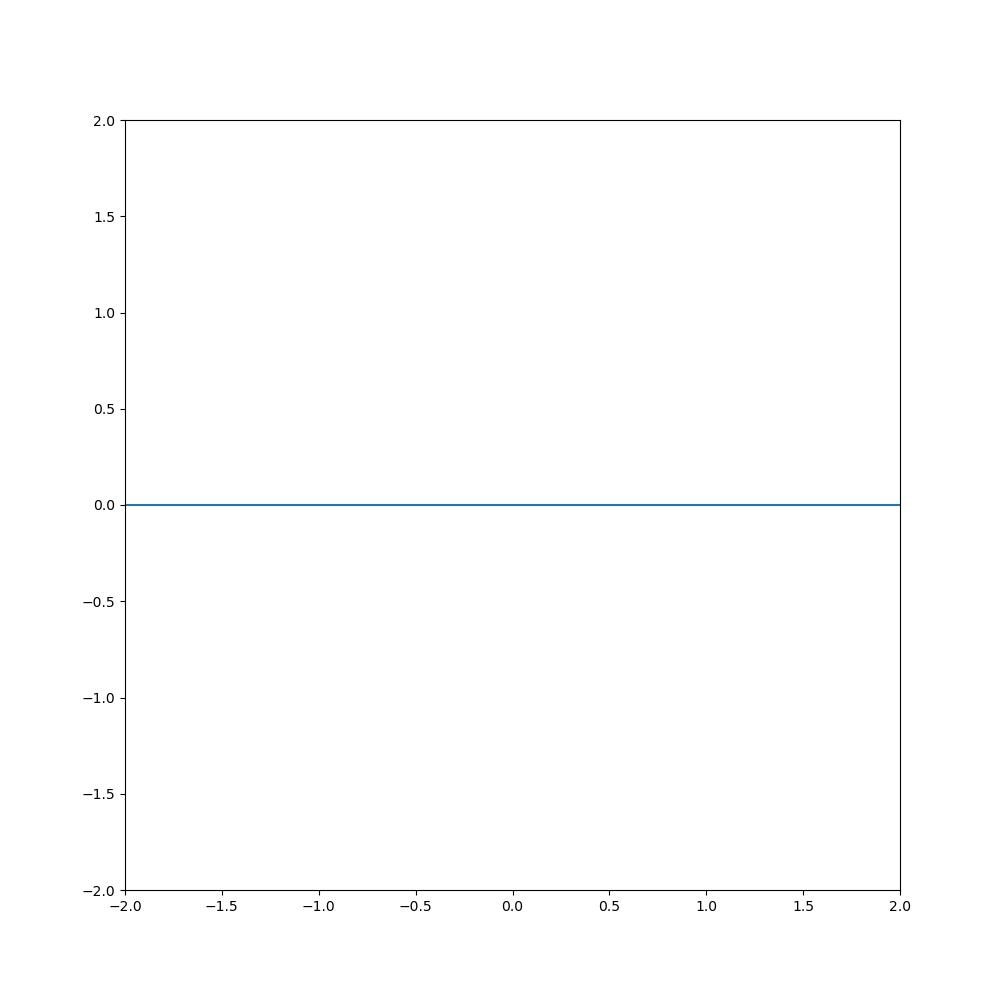

In [215]:
fig = plt.figure(figsize = (10, 10))
plt.axis([-2, 2, -2, 2])
plt.plot(y, z)